# Classification Problem on Loan Prediction

The Machine Learning Classification algorithms are performed on a small records of Loan Prediction data to fetch the highest possible Accuracy and AUC Score

## Problem Statement:
A study of Clustering problem on a small dataset based on Loan Prediction. Using this, we are predicting the highest Accuracy and AUC Score on a small set of Records.

## About this Dataset:
The Loan Prediction Dataset consists of 615 records and 13 columns. This dataset was taken from Kaggle.

## Column Description:
Loan_ID - Unique Loan ID

Gender - MALE or FEMALE

Married - Whether the Applicant is Married or Not

Dependents - Number of Dependents the Applicant shares with

Education - Whether the Applicant is Graduate or Not Graduate

Self_Employed - The Applicant is Self Employed or Not

ApplicantIncome - Income of an Applicant

CoapplicantIncome - Income of the Dependent

LoanAmount - Loan amount in thousands of dollars

Loan_Amount_Term - Term of loan in months

Credit_History - credit history meets guidelines yes or no

Property_Area - Urban/ Semi Urban/ Rural

Loan_Status - Loan approved (Y/N) this is the target variable

In [1]:
#importing libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import random
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, LabelEncoder

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn import tree

In [6]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import sklearn.metrics as metrics

In [7]:
from imblearn.over_sampling import SMOTE

In [8]:
#Read the dataset (tab, csv, xls, txt, inbuilt dataset)

In [9]:
df=pd.read_csv('D:\\M. Tech in Data Science & Machine Learning\\Machine Learning 2\\Sem_preparation\\Problem-on-Loan-Prediction-main\\Loan Predictions Dataset.csv')
df.head()#first 5 observations

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
df.tail()#last 5 observations

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [11]:
df.shape #614 records and 13 columns

(614, 13)

In [12]:
df.info() #sumary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [13]:
#Explore the types of variables (continuous, categorical etc.)

In [14]:
df_num=df.select_dtypes(include=np.number)
len(df_num.columns)#total numerical columns

5

In [15]:
df_num.columns#numerical columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [16]:
df_cat=df.select_dtypes(include='object')
len(df_cat.columns)#total numerical columns

8

In [17]:
df_cat.columns#categorical columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [18]:
#Calculate five point summary for numerical variables. 
#Summarize observations for categorical variables – no. of categories, % observations in each category.

In [19]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [20]:
#Infernces:

#maximum ApplicantIncome is 81000 dolars and average is 5403 dollars
#maximum LoanAmount is 700 dolars and average is 146 dollars

In [21]:
df_cat.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [22]:
for i in df_cat.columns:
    print('% observations in each category in the column',i,':')
    print(df_cat[i].value_counts()*100/len(df_cat))
    print()
    print()

% observations in each category in the column Loan_ID :
LP001384    0.162866
LP001716    0.162866
LP002832    0.162866
LP002738    0.162866
LP002602    0.162866
              ...   
LP002361    0.162866
LP001644    0.162866
LP001100    0.162866
LP001426    0.162866
LP002115    0.162866
Name: Loan_ID, Length: 614, dtype: float64


% observations in each category in the column Gender :
Male      79.641694
Female    18.241042
Name: Gender, dtype: float64


% observations in each category in the column Married :
Yes    64.820847
No     34.690554
Name: Married, dtype: float64


% observations in each category in the column Dependents :
0     56.188925
1     16.612378
2     16.449511
3+     8.306189
Name: Dependents, dtype: float64


% observations in each category in the column Education :
Graduate        78.175896
Not Graduate    21.824104
Name: Education, dtype: float64


% observations in each category in the column Self_Employed :
No     81.433225
Yes    13.355049
Name: Self_Employed, d

In [23]:
#Check for defects in the data. Perform necessary actions to ‘fix’ these defects.

In [24]:
#checking for null values

In [25]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

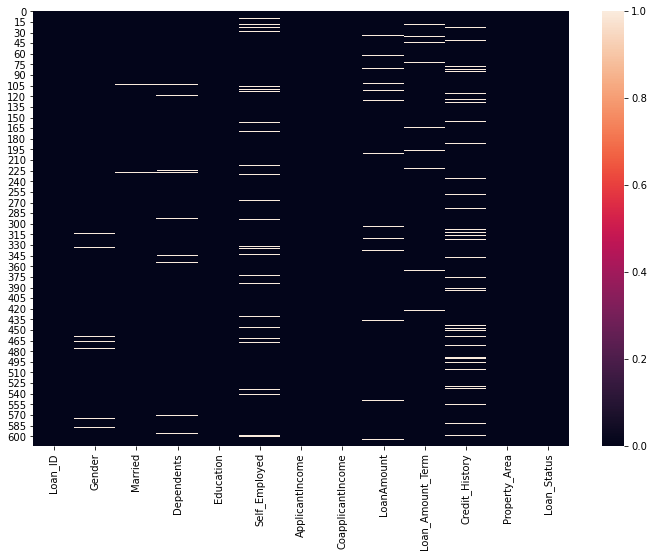

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),cbar=True)
plt.show()

In [27]:
df.isnull().sum()*100/len(df)#% of missing values

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [28]:
#Gender

In [29]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [30]:
df['Gender']=df['Gender'].replace(np.nan,'Male')#as male is more dominant replace by missing values by male

In [31]:
#Married

In [32]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [33]:
df['Married']=df['Married'].replace(np.nan,'Yes')#as Yes is more dominant replace by missing values by Yes

In [34]:
#Dependents

In [35]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [36]:
df['Dependents']=df['Dependents'].replace(np.nan,0)#as 0 is more dominant replace by missing values by 0

In [37]:
#Self_Employed

In [38]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [39]:
df['Self_Employed']=df['Self_Employed'].replace(np.nan,'No')#as No is more dominant replace by missing values by No     

In [40]:
#LoanAmount

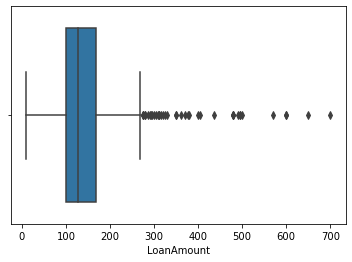

In [41]:
sns.boxplot(df['LoanAmount'])
plt.show()

In [42]:
df['LoanAmount'].mean(),df['LoanAmount'].median()

(146.41216216216216, 128.0)

In [43]:
df['LoanAmount']=df['LoanAmount'].replace(np.nan,df['LoanAmount'].median())#as outliers are there replace by median

In [44]:
#Loan_Amount_Term

In [45]:
df['Loan_Amount_Term'].value_counts()    

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [46]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].replace(np.nan,360.0)#as 360 is more dominant replace by missing values by 360     

In [47]:
#Credit_History

In [48]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [49]:
df['Credit_History']=df['Credit_History'].replace(np.nan,1.0)#as 1.0 is more dominant replace by missing values by 1.0     

In [50]:
df.isnull().sum()*100/len(df)#% of missing values

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [51]:
#checkig for outliers

Box plot for the column ApplicantIncome


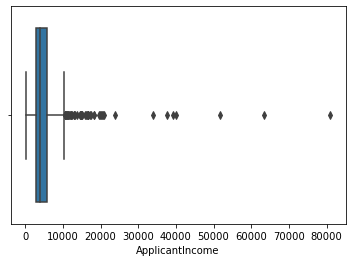


Box plot for the column CoapplicantIncome


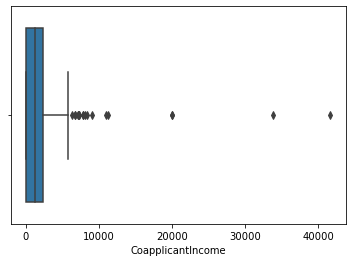


Box plot for the column LoanAmount


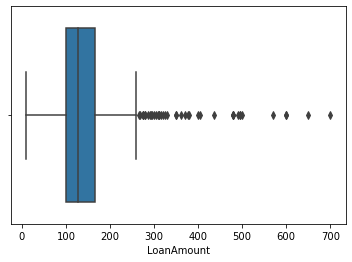


Box plot for the column Loan_Amount_Term


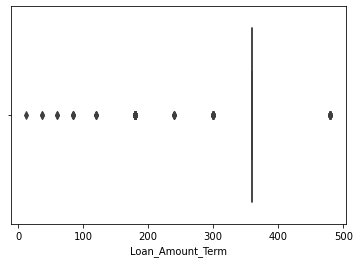


Box plot for the column Credit_History


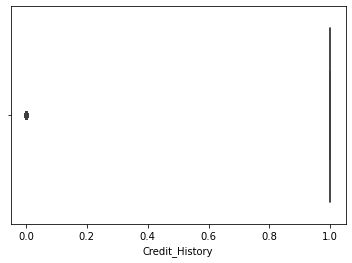

In [52]:
for i in df.select_dtypes(include=np.number).columns:
    print('Box plot for the column',i)
    sns.boxplot(df[i])
    plt.show()
    print()

In [53]:
#For modelling purposes we will go ahed with the outliers 

In [54]:
#Plot relevant categorical plots. 
#Find out which are the variables most correlated or appear to be in causation with Target? 
#Do you want to exclude some variables from the model based on this analysis? What other actions will you take?

In [55]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [56]:
df['Loan_Status']=df['Loan_Status'].replace('Y',1)#Loan approved than yes
df['Loan_Status']=df['Loan_Status'].replace('N',0)#Loan approved than no

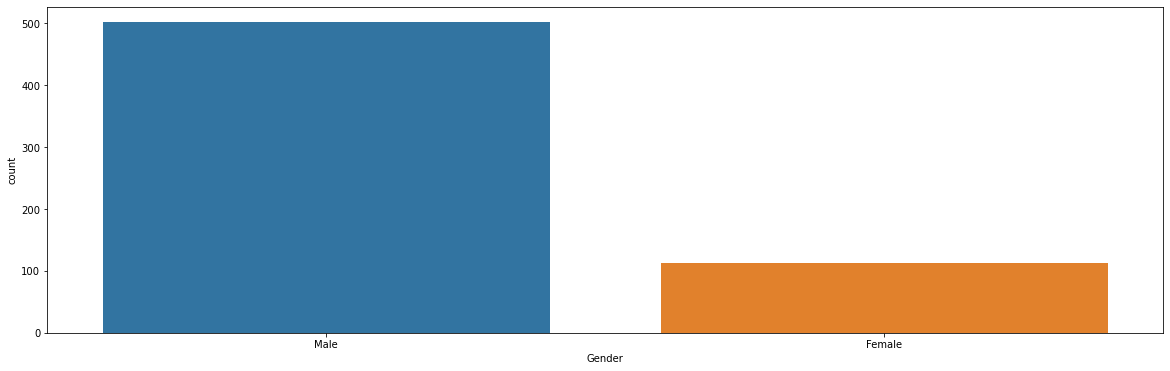

In [57]:
plt.figure(figsize=(20,6))
sns.countplot(df['Gender'])
plt.show()

In [58]:
#Male is more dominant in the gender attribute

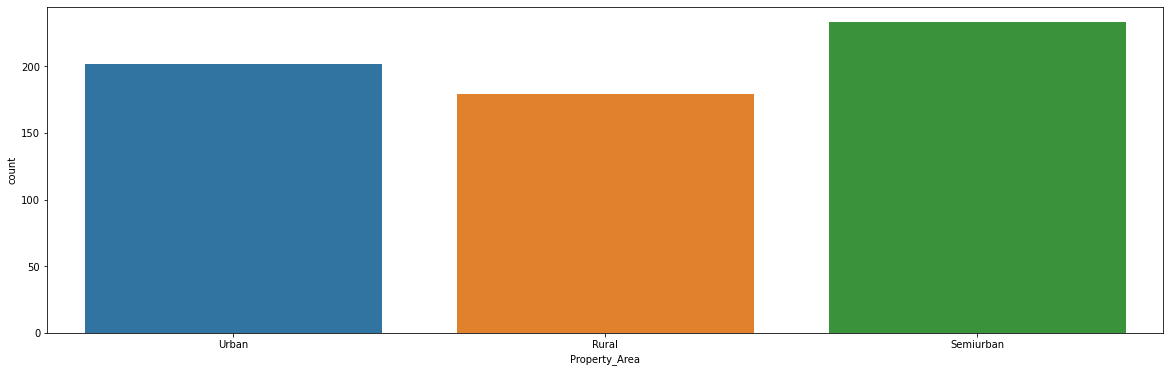

In [59]:
plt.figure(figsize=(20,6))
sns.countplot(df['Property_Area'])
plt.show()

In [60]:
#Many people Reise from Urabn and Semiurabn

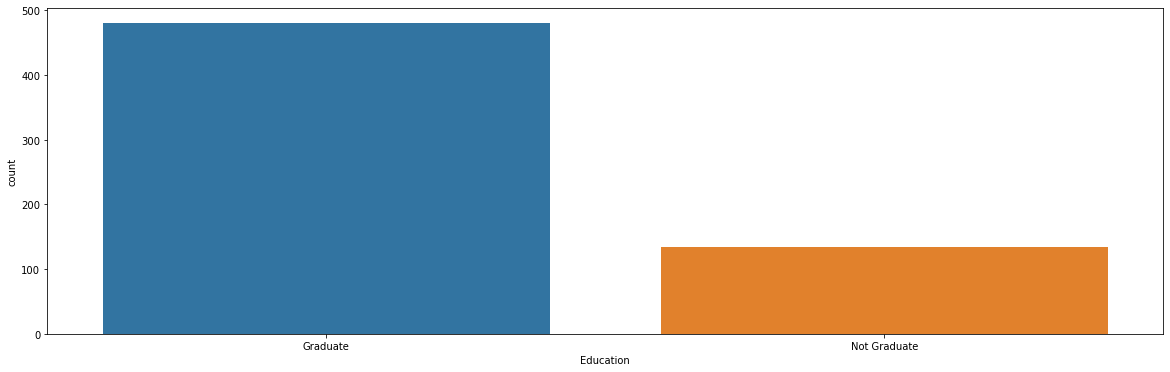

In [61]:
plt.figure(figsize=(20,6))
sns.countplot(df['Education'])
plt.show()

In [62]:
#More people are Graduate in education attribute

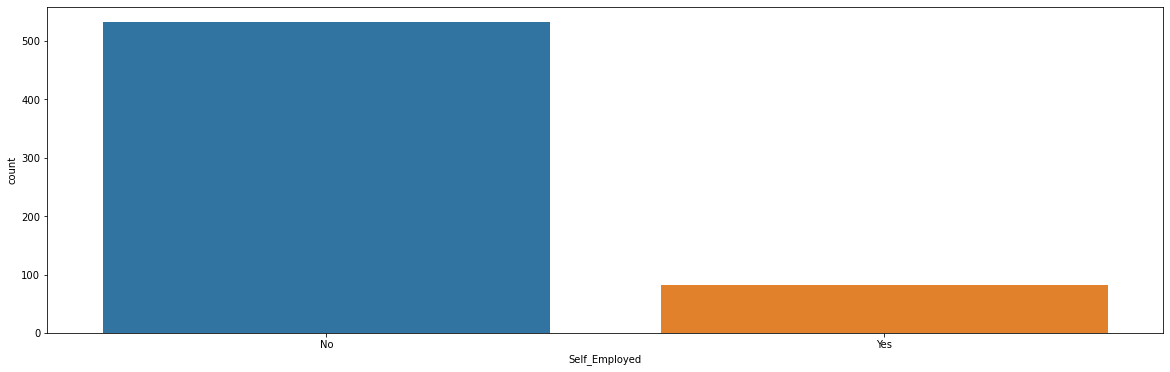

In [63]:
plt.figure(figsize=(20,6))
sns.countplot(df['Self_Employed'])
plt.show()

In [64]:
#Many people are not self-employed

In [65]:
#covariance plot

In [66]:
df.cov()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,3.732039e+07,-2.084490e+06,290397.998060,-18314.518335,-40.068717,-13.348805
CoapplicantIncome,-2.084490e+06,8.562930e+06,46570.025909,-11195.741238,11.479406,-80.358575
LoanAmount,2.903980e+05,4.657003e+04,7074.026707,200.284477,-0.017998,-1.296135
Loan_Amount_Term,-1.831452e+04,-1.119574e+04,200.284477,4151.048244,-0.106806,-0.674060
Credit_History,-4.006872e+01,1.147941e+01,-0.017998,-0.106806,0.124142,0.088368
Loan_Status,-1.334881e+01,-8.035858e+01,-1.296135,-0.674060,0.088368,0.215271


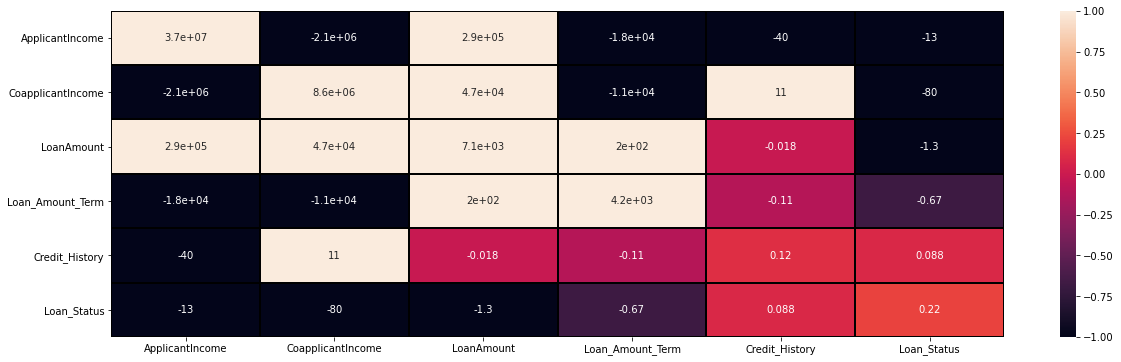

In [67]:
plt.figure(figsize=(20,6))
sns.heatmap(df.cov(),annot=True, linecolor='black',vmin=-1,vmax=1,linewidth=1)
plt.show()

In [68]:
##Corealtion plot

In [69]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134,-0.059187
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607,-0.033214
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.022549
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.540556
Loan_Status,-0.004710,-0.059187,-0.033214,-0.022549,0.540556,1.000000


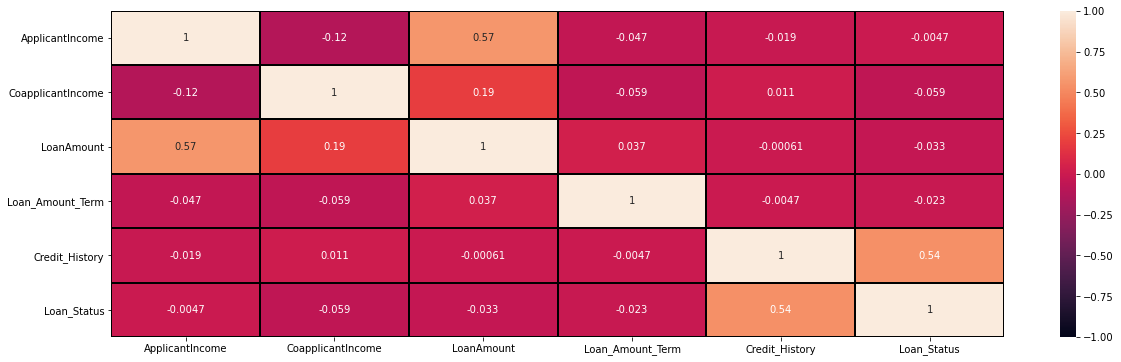

In [70]:
plt.figure(figsize=(20,6))
sns.heatmap(df.corr(),annot=True, linecolor='black',vmin=-1,vmax=1,linewidth=1)
plt.show()

In [71]:
#Inferences:

#Credit_History has a good positve corealtion with the target variable Loan_Status
##As Credit_History increases the probality of getting loan also increases


#LoanAmount and ApplicantIncome has good positve corealtion with each other
#As the applicant income increase the laon amount for him will aslo increaes

#CoapplicantIncome and ApplicantIncome have negative corealtion with each other

In [72]:
#Plot all independent variables with the target & find out the relationship? 
#Perform the Relevant Tests to find out if the Independent variables are associated with the Target Variable.

In [73]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

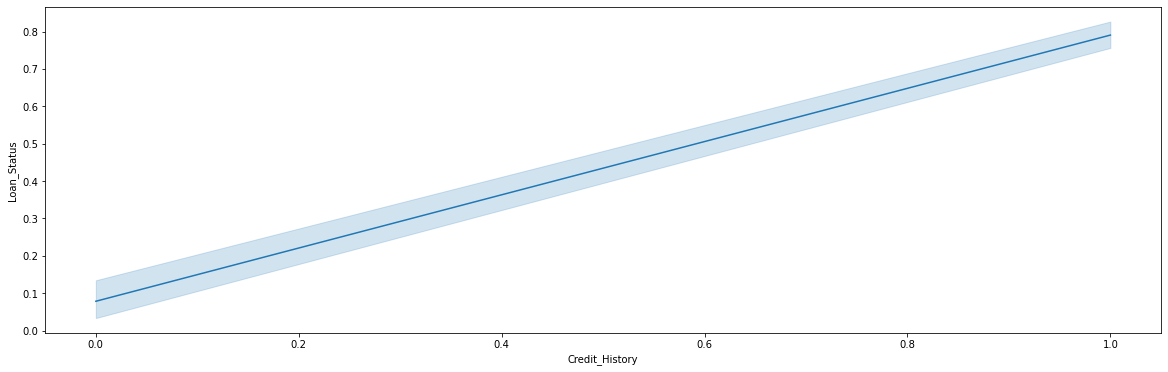

In [74]:
plt.figure(figsize=(20,6))
sns.lineplot(x=df['Credit_History'],y=df['Loan_Status'])
plt.show()

In [75]:
#As Credit_History increases the probality of getting loan also increases

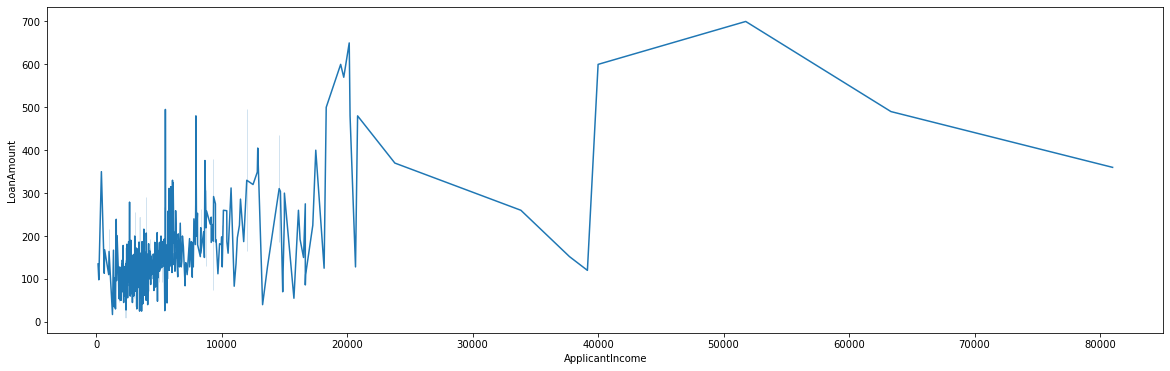

In [76]:
plt.figure(figsize=(20,6))
sns.lineplot(y=df['LoanAmount'],x=df['ApplicantIncome'])
plt.show()

In [77]:
#As the applicant income increase the laon amount for him will aslo increaes

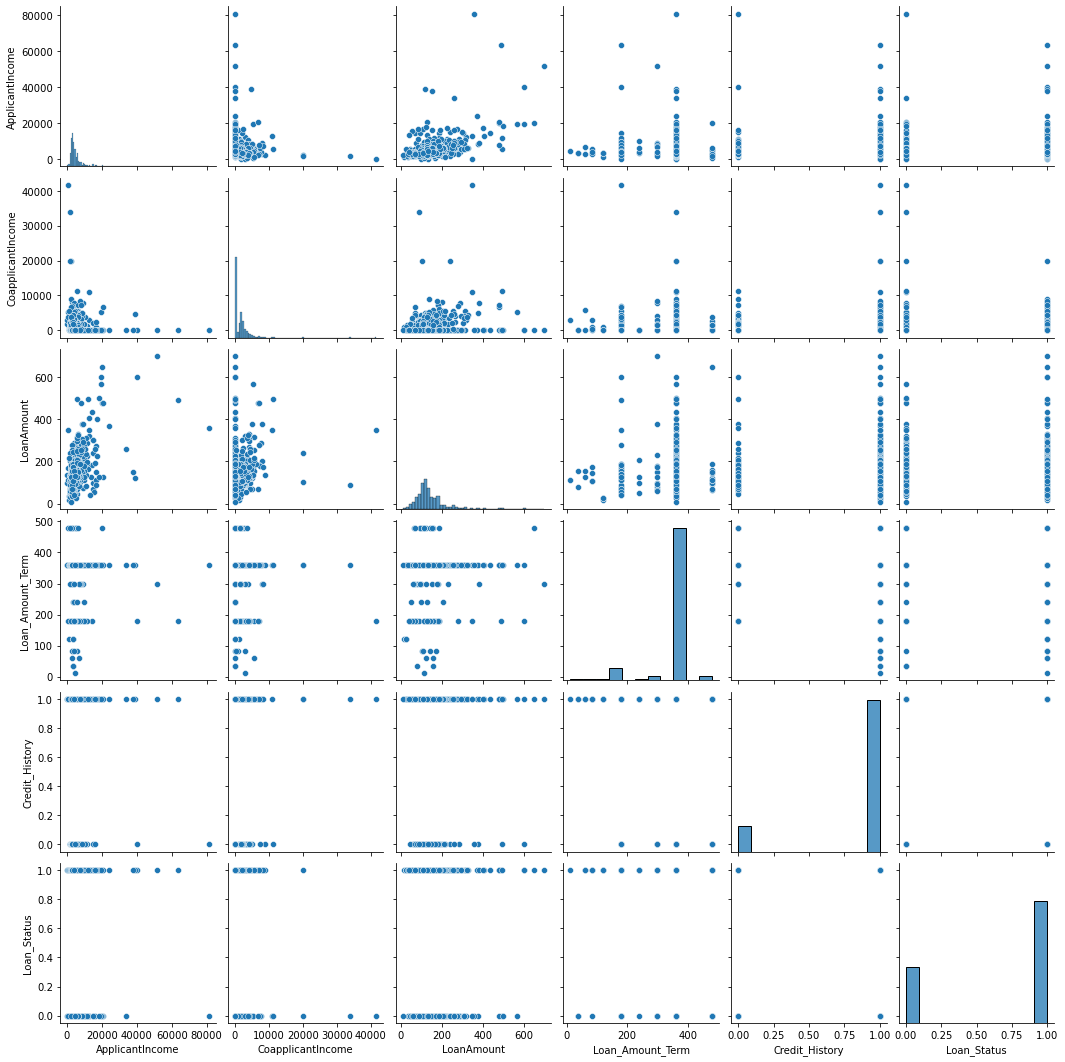

In [78]:
sns.pairplot(df)#pairplot

In [79]:
#Infernces:

#Some attiributes poses some liearity between them

In [80]:
#Split dataset into train and test (70:30).
#Are both train and test representative of the overall data? How would you ascertain this statistically?

In [81]:
df1=df.copy()#makig copy of the original dataframe

In [82]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [83]:
df1=df.drop('Loan_ID',axis=1)#droping unwanted columns

In [84]:
df1['Dependents']=df1['Dependents'].replace('3+',3)

In [85]:
df1['Dependents']=df1['Dependents'].astype('int')

In [86]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int32(1), int64(2), object(5)
memory usage: 55.3+ KB


In [87]:
#Encoding

In [88]:
Label_Encoder=LabelEncoder()
df1['Gender']=Label_Encoder.fit_transform(df1['Gender'])
df1['Married']=Label_Encoder.fit_transform(df1['Married'])
df1['Education']=Label_Encoder.fit_transform(df1['Education'])
df1['Self_Employed']=Label_Encoder.fit_transform(df1['Self_Employed'])
df1['Property_Area']=Label_Encoder.fit_transform(df1['Property_Area'])

In [89]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [90]:
#Scaling

In [91]:
df1_1=df1.drop('Loan_Status',axis=1)

In [92]:
Standard_scaler=StandardScaler()
df1_new=Standard_scaler.fit_transform(df1_1)
X=pd.DataFrame(df1_new,columns=df1_1.columns)

In [93]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.072991,-0.554487,-0.211241,0.273231,0.411733,1.223298
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.134412,-0.038732,-0.211241,0.273231,0.411733,-1.318513
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.393747,-0.554487,-0.948996,0.273231,0.411733,1.223298
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.462062,0.251980,-0.306435,0.273231,0.411733,1.223298
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.097728,-0.554487,-0.056551,0.273231,0.411733,1.223298


In [94]:
Y=df1['Loan_Status']

In [95]:
sm=SMOTE(random_state=2)
X1,Y1=sm.fit_resample(X,Y)

In [96]:
Y1.value_counts()

0    422
1    422
Name: Loan_Status, dtype: int64

In [97]:
x_train,x_test,y_train,y_test= train_test_split(X1,Y1,test_size=0.3, random_state=2)

In [98]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(590, 11)
(254, 11)
(590,)
(254,)


In [99]:
#Build the base model and explain the reason of selecting that model. What is the overall accuracy?
#Also comment whether it is good or bad.

In [100]:
#1. KNeighborsClassifier

In [101]:
knc=KNeighborsClassifier()
K_Neighbors_Classifier=knc.fit(x_train,y_train)

In [102]:
knc_pred=K_Neighbors_Classifier.predict(x_test)

In [103]:
print(classification_report(knc_pred,y_test))

              precision    recall  f1-score   support

           0       0.71      0.74      0.72       124
           1       0.74      0.71      0.72       130

    accuracy                           0.72       254
   macro avg       0.72      0.72      0.72       254
weighted avg       0.73      0.72      0.72       254



In [104]:
confusion_matrix(knc_pred,y_test)

array([[92, 32],
       [38, 92]], dtype=int64)

In [105]:
accuracy_score(knc_pred,y_test)*100

72.44094488188976

In [106]:
##Inference:

#Accuracy of the model is 72

#Precison of the model is high amlost 0.72

#TPR(true positive rate) ie, Recall is also high 0.72

In [107]:
#ROC Curve

In [108]:
fpr1,tpr1,threshold1=metrics.roc_curve(knc_pred,y_test)
roc_auc1=metrics.auc(fpr1,tpr1)

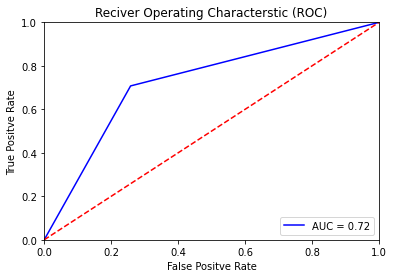

In [109]:
plt.title('Reciver Operating Characterstic (ROC)')
plt.plot(fpr1,tpr1,'b',label='AUC = %0.2f' %roc_auc1)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positve Rate')
plt.ylabel('True Positve Rate')
plt.show()

In [110]:
#Interpretation: 
#The red dotted line represents the ROC curve of a purely random classifier; 
#a good classifier stays as far away from that line as possible (toward the top-left corner).

#From the above plot, we can see that our classifier (KNeighborsClassifier) is away from the red dotted line; 
#with the AUC score 0.72.

In [111]:
#To check if the model is overfitting

In [112]:
knc_pred_train=K_Neighbors_Classifier.predict(x_train)

In [113]:
print(classification_report(knc_pred_train,y_train))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       295
           1       0.83      0.83      0.83       295

    accuracy                           0.83       590
   macro avg       0.83      0.83      0.83       590
weighted avg       0.83      0.83      0.83       590



In [114]:
confusion_matrix(knc_pred_train,y_train)

array([[243,  52],
       [ 49, 246]], dtype=int64)

In [115]:
accuracy_score(knc_pred_train,y_train)*100

82.88135593220339

In [116]:
#The model is over fitted on tain accuracy

In [117]:
#Tune the Hyperparameters using GridSearchCV (KNeighborsClassifier)

In [118]:
tuning_parameters={'n_neighbors':range(2,25),
                     'metric':['hamming','minkowski','manhattan','euclidean']}

In [119]:
knc2=KNeighborsClassifier()
knc_grid=GridSearchCV(estimator=knc2,param_grid=tuning_parameters,cv=3,scoring='accuracy')
knc_grid.fit(x_train,y_train)
print('Best parameters for KNeighborsClassifier: ', knc_grid.best_params_, '\n')

Best parameters for KNeighborsClassifier:  {'metric': 'manhattan', 'n_neighbors': 5} 



In [120]:
knc3=KNeighborsClassifier(n_neighbors=5,metric='manhattan')
K_Neighbors_Classifier3=knc3.fit(x_train,y_train)

In [121]:
knc_pred3=K_Neighbors_Classifier3.predict(x_test)

In [122]:
print(classification_report(knc_pred3,y_test))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74       117
           1       0.79      0.72      0.75       137

    accuracy                           0.74       254
   macro avg       0.75      0.75      0.74       254
weighted avg       0.75      0.74      0.74       254



In [123]:
confusion_matrix(knc_pred3,y_test)

array([[91, 26],
       [39, 98]], dtype=int64)

In [124]:
accuracy_score(knc_pred3,y_test)*100

74.40944881889764

In [125]:
#To check if the overfitting is reduced

In [126]:
knc_pred3_train=K_Neighbors_Classifier3.predict(x_train)

In [127]:
print(classification_report(knc_pred3_train,y_train))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       276
           1       0.86      0.81      0.83       314

    accuracy                           0.83       590
   macro avg       0.83      0.83      0.83       590
weighted avg       0.83      0.83      0.83       590



In [128]:
confusion_matrix(knc_pred3_train,y_train)

array([[233,  43],
       [ 59, 255]], dtype=int64)

In [129]:
accuracy_score(knc_pred3_train,y_train)*100

82.71186440677965

In [130]:
#Even after GridSearchCV the overfitting has not decreased

In [131]:
#2.DecisionTreeClassifier

In [132]:
dtc=DecisionTreeClassifier()
Decision_Tree_Classifier=dtc.fit(x_train,y_train)

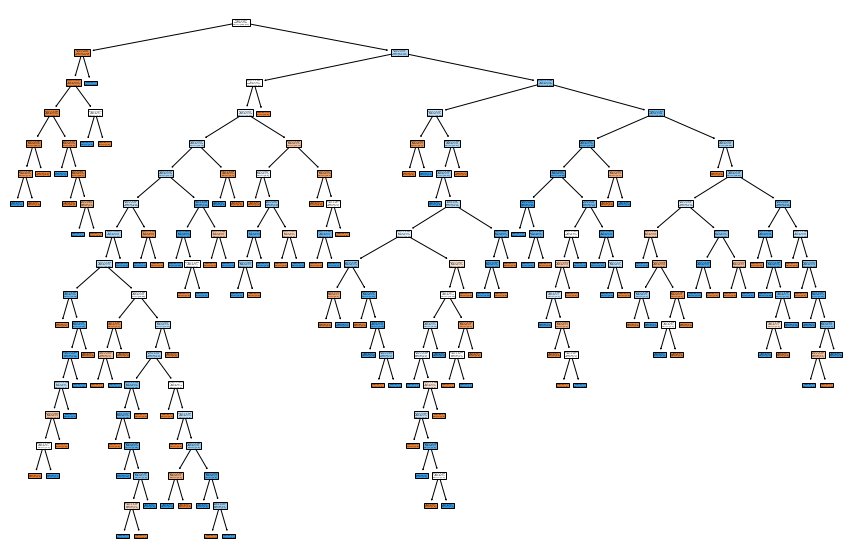

In [133]:
plt.figure(figsize=(15,10))
tree.plot_tree(Decision_Tree_Classifier,filled=True)
plt.show()

In [134]:
dtc_pred=Decision_Tree_Classifier.predict(x_test)

In [135]:
print(classification_report(dtc_pred,y_test))

              precision    recall  f1-score   support

           0       0.79      0.74      0.77       139
           1       0.71      0.77      0.74       115

    accuracy                           0.75       254
   macro avg       0.75      0.75      0.75       254
weighted avg       0.75      0.75      0.75       254



In [136]:
confusion_matrix(dtc_pred,y_test)

array([[103,  36],
       [ 27,  88]], dtype=int64)

In [137]:
accuracy_score(dtc_pred,y_test)*100

75.19685039370079

In [138]:
##Inference:

#Accuracy of the model is 75

#Precison of the model is high amlost 0.75

#TPR(true positive rate) ie, Recall is also high 0.75

In [139]:
#ROC Curve

In [140]:
fpr2,tpr2,threshold2=metrics.roc_curve(dtc_pred,y_test)
roc_auc2=metrics.auc(fpr2,tpr2)

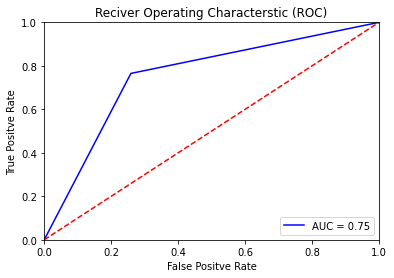

In [141]:
plt.title('Reciver Operating Characterstic (ROC)')
plt.plot(fpr2,tpr2,'b',label='AUC = %0.2f' %roc_auc2)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positve Rate')
plt.ylabel('True Positve Rate')
plt.show()

In [142]:
#Interpretation: 
#The red dotted line represents the ROC curve of a purely random classifier; 
#a good classifier stays as far away from that line as possible (toward the top-left corner).

#From the above plot, we can see that our classifier (KNeighborsClassifier) is away from the red dotted line; 
#with the AUC score 0.76.

In [143]:
#To check if the model is overfitting

In [144]:
dtc_pred_train=Decision_Tree_Classifier.predict(x_train)

In [145]:
print(classification_report(dtc_pred_train,y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       292
           1       1.00      1.00      1.00       298

    accuracy                           1.00       590
   macro avg       1.00      1.00      1.00       590
weighted avg       1.00      1.00      1.00       590



In [146]:
confusion_matrix(dtc_pred_train,y_train)

array([[292,   0],
       [  0, 298]], dtype=int64)

In [147]:
accuracy_score(dtc_pred_train,y_train)*100

100.0

In [148]:
#The model is over fitted on tain accuracy

In [149]:
#Tune the Hyperparameters using GridSearchCV (DecisionTreeClassifier)

In [150]:
tuning_parameters2={'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 10),
                     'min_samples_split': range(2,10)
                     }

In [151]:
dtc2=DecisionTreeClassifier()
dtc_grid=GridSearchCV(estimator=dtc2,param_grid=tuning_parameters2,cv=3,scoring='accuracy')
dtc_grid.fit(x_train,y_train)
print('Best parameters for DecisionTreeClassifier: ', dtc_grid.best_params_, '\n')

Best parameters for DecisionTreeClassifier:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 8} 



In [152]:
dtc3=DecisionTreeClassifier(criterion='gini',
    max_depth=5,
    min_samples_split=8)
Decision_Tree_Classifier3=dtc3.fit(x_train,y_train)

In [153]:
dtc_pred3=Decision_Tree_Classifier3.predict(x_test)

In [154]:
print(classification_report(dtc_pred3,y_test))

              precision    recall  f1-score   support

           0       0.55      0.92      0.69        77
           1       0.95      0.67      0.78       177

    accuracy                           0.74       254
   macro avg       0.75      0.79      0.74       254
weighted avg       0.83      0.74      0.75       254



In [155]:
confusion_matrix(dtc_pred3,y_test)

array([[ 71,   6],
       [ 59, 118]], dtype=int64)

In [156]:
accuracy_score(dtc_pred3,y_test)*100

74.40944881889764

In [157]:
#To check if the overfitting is reduced

In [158]:
dtc_pred3_train=Decision_Tree_Classifier3.predict(x_train)

In [159]:
print(classification_report(dtc_pred3_train,y_train))

              precision    recall  f1-score   support

           0       0.62      0.95      0.75       191
           1       0.97      0.72      0.83       399

    accuracy                           0.79       590
   macro avg       0.79      0.83      0.79       590
weighted avg       0.85      0.79      0.80       590



In [160]:
confusion_matrix(dtc_pred3_train,y_train)

array([[181,  10],
       [111, 288]], dtype=int64)

In [161]:
accuracy_score(dtc_pred3_train,y_train)*100

79.49152542372882

In [162]:
#After the Grid Search Overfitting if the model is decreases considerably

In [163]:
#Feature Importance

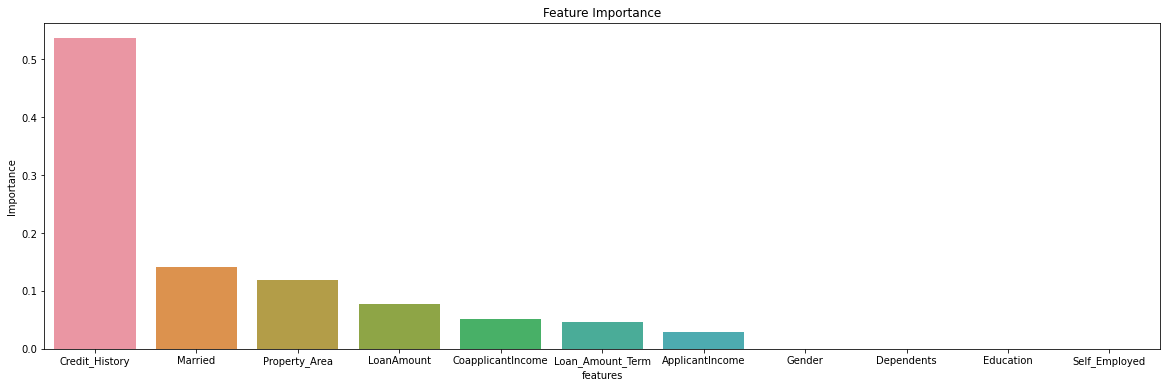

In [164]:
important_feature1=pd.DataFrame({'features':x_train.columns,
                                'Importance':Decision_Tree_Classifier3.feature_importances_})


important_feature1=important_feature1.sort_values(by='Importance',ascending=False)
plt.figure(figsize=(20,6))
sns.barplot(x='features',y='Importance',data=important_feature1)
plt.title('Feature Importance')
plt.show()

In [165]:
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.ensemble import RandomForestClassifier

In [166]:
#3.RandomForestClassifier

In [167]:
rfc=RandomForestClassifier()
Random_Forest_Classifier=rfc.fit(x_train,y_train)

In [168]:
rfc_pred=Random_Forest_Classifier.predict(x_test)

In [169]:
print(classification_report(rfc_pred,y_test))

              precision    recall  f1-score   support

           0       0.75      0.89      0.81       109
           1       0.90      0.77      0.83       145

    accuracy                           0.82       254
   macro avg       0.82      0.83      0.82       254
weighted avg       0.84      0.82      0.82       254



In [170]:
confusion_matrix(rfc_pred,y_test)

array([[ 97,  12],
       [ 33, 112]], dtype=int64)

In [171]:
accuracy_score(rfc_pred,y_test)*100

82.28346456692913

In [172]:
##Inference:

#Accuracy of the model is 84.25

#Precison of the model is high amlost 0.84

#TPR(true positive rate) ie, Recall is also high 0.84

In [173]:
#ROC curve

In [174]:
fpr3,tpr3,threshold3=metrics.roc_curve(rfc_pred,y_test)
roc_auc3=metrics.auc(fpr3,tpr3)

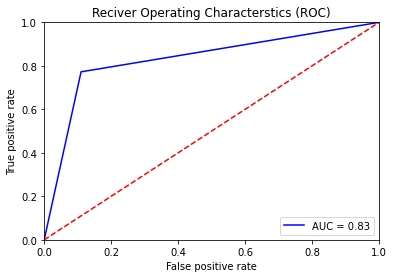

In [175]:
plt.title('Reciver Operating Characterstics (ROC)')
plt.plot(fpr3,tpr3,'b',label='AUC = %0.2f' %roc_auc3)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

In [176]:
#Interpretation: 
#The red dotted line represents the ROC curve of a purely random classifier; 
#a good classifier stays as far away from that line as possible (toward the top-left corner).

#From the above plot, we can see that our classifier (RandomForestClassifier) is away from the red dotted line; 
#with the AUC score 0.85.

In [177]:
#to check if the model is overfitted 

In [178]:
rfc_pred_train=Random_Forest_Classifier.predict(x_train)

In [179]:
print(classification_report(rfc_pred_train,y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       292
           1       1.00      1.00      1.00       298

    accuracy                           1.00       590
   macro avg       1.00      1.00      1.00       590
weighted avg       1.00      1.00      1.00       590



In [180]:
confusion_matrix(rfc_pred_train,y_train)

array([[292,   0],
       [  0, 298]], dtype=int64)

In [181]:
accuracy_score(rfc_pred_train,y_train)*100

100.0

In [182]:
#There is overfitting in the model on train accuracy

In [183]:
#Tune the Hyperparameters using GridSearchCV (RandomForestClassifier)

In [184]:
tuning_parameters_3={'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 30, 50, 70, 90],
                     'max_depth': [5],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 5],
                     'min_samples_leaf': [1, 5],
                     'max_leaf_nodes': [2, 5]}

In [185]:
rfc1=RandomForestClassifier()
rfc_grid=GridSearchCV(estimator=rfc1,param_grid=tuning_parameters_3,cv=3,scoring='accuracy')
rfc_grid.fit(x_train,y_train)
print('Best parameters for RandomForestClassifier: ', rfc_grid.best_params_ , '\n')

Best parameters for RandomForestClassifier:  {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 5, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 10} 



In [186]:
rfc2=RandomForestClassifier(n_estimators=10,criterion='entropy',max_depth=5,max_features='sqrt',
                           max_leaf_nodes=5,min_samples_leaf=5,min_samples_split=2)
Random_Forest_Classifier2=rfc2.fit(x_train,y_train)

In [187]:
rfc_pred2=Random_Forest_Classifier2.predict(x_test)

In [188]:
print(classification_report(rfc_pred2,y_test))

              precision    recall  f1-score   support

           0       0.59      0.84      0.69        92
           1       0.88      0.67      0.76       162

    accuracy                           0.73       254
   macro avg       0.74      0.75      0.73       254
weighted avg       0.78      0.73      0.74       254



In [189]:
confusion_matrix(rfc_pred2,y_test)

array([[ 77,  15],
       [ 53, 109]], dtype=int64)

In [190]:
accuracy_score(rfc_pred2,y_test)*100

73.22834645669292

In [191]:
#checking if the overfitting has reduced

In [192]:
rfc_pred2_train=Random_Forest_Classifier2.predict(x_train)

In [193]:
print(classification_report(rfc_pred2_train,y_train))

              precision    recall  f1-score   support

           0       0.62      0.85      0.72       214
           1       0.89      0.70      0.79       376

    accuracy                           0.76       590
   macro avg       0.75      0.78      0.75       590
weighted avg       0.79      0.76      0.76       590



In [194]:
confusion_matrix(rfc_pred2_train,y_train)

array([[181,  33],
       [111, 265]], dtype=int64)

In [195]:
accuracy_score(rfc_pred2_train,y_train)*100

75.59322033898304

In [196]:
#After GridSearchCV on RandomForestClassifier with the tunned parameters the Overfitting has reduced 

In [197]:
#Feature Importance

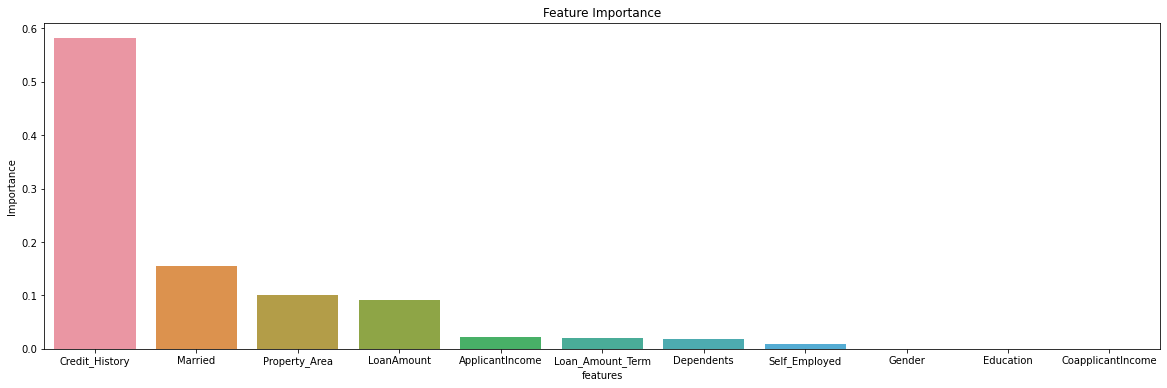

In [198]:
features_importance_2=pd.DataFrame({'features': x_train.columns,
                                   'Importance':Random_Forest_Classifier2.feature_importances_ })

features_importance_2=features_importance_2.sort_values(by='Importance',ascending=False)

plt.figure(figsize=(20,6))
sns.barplot(x='features',y='Importance',data=features_importance_2)
plt.title('Feature Importance')
plt.show()

In [199]:
#4. AdaBoostClassifier

In [200]:
ada=AdaBoostClassifier(n_estimators=40,random_state=2)
AdaBoost_classifier=ada.fit(x_train,y_train)

In [201]:
ada_pred=AdaBoost_classifier.predict(x_test)

In [202]:
print(classification_report(ada_pred,y_test))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73       109
           1       0.82      0.70      0.76       145

    accuracy                           0.74       254
   macro avg       0.75      0.75      0.74       254
weighted avg       0.76      0.74      0.75       254



In [203]:
confusion_matrix(ada_pred,y_test)

array([[ 87,  22],
       [ 43, 102]], dtype=int64)

In [204]:
accuracy_score(ada_pred,y_test)*100

74.40944881889764

In [205]:
##Inference:

#Accuracy of the model is 74

#Precison of the model is high amlost 0.75

#TPR(true positive rate) ie, Recall is also high 0.75

In [206]:
fpr4,tpr4,threshold4=metrics.roc_curve(ada_pred,y_test)
roc_auc4=metrics.auc(fpr4,tpr4)

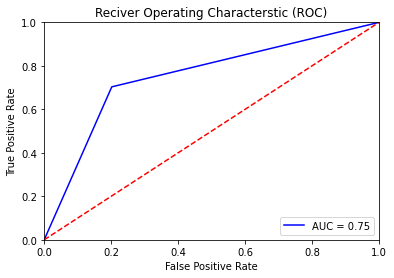

In [207]:
plt.title('Reciver Operating Characterstic (ROC)')
plt.plot(fpr4,tpr4,'b',label='AUC = %0.2f' %roc_auc4)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [208]:
#Interpretation: 
#The red dotted line represents the ROC curve of a purely random classifier; 
#a good classifier stays as far away from that line as possible (toward the top-left corner).

#From the above plot, we can see that our classifier (RandomForestClassifier) is away from the red dotted line; 
#with the AUC score 0.75.

In [209]:
#To check if the model is overfitted or not

In [210]:
ada_pred_train=AdaBoost_classifier.predict(x_train)

In [211]:
print(classification_report(ada_pred_train,y_train))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       256
           1       0.88      0.79      0.83       334

    accuracy                           0.82       590
   macro avg       0.82      0.83      0.82       590
weighted avg       0.83      0.82      0.82       590



In [212]:
confusion_matrix(ada_pred_train,y_train)

array([[221,  35],
       [ 71, 263]], dtype=int64)

In [213]:
accuracy_score(ada_pred_train,y_train)*100

82.03389830508473

In [214]:
#There is overfitting in the model on train accuracy

In [215]:
#Tune the Hyperparameters using GridSearchCV (AdaBoostClassifier)

In [216]:
tuning_parameters_4={'n_estimators':range(30,70)}

In [217]:
ada1=AdaBoostClassifier()
ada_grid=GridSearchCV(estimator=ada1,param_grid=tuning_parameters_4,cv=3,scoring='accuracy')
ada_grid.fit(x_train,y_train)
print('Best parameters for AdaBoostClassifier: ', ada_grid.best_params_ , '\n')

Best parameters for AdaBoostClassifier:  {'n_estimators': 66} 



In [218]:
ada2=AdaBoostClassifier(n_estimators=66,random_state=2)
AdaBoost_classifier2=ada2.fit(x_train,y_train)

In [219]:
ada_pred2=AdaBoost_classifier2.predict(x_test)

In [220]:
print(classification_report(ada_pred2,y_test))

              precision    recall  f1-score   support

           0       0.68      0.79      0.73       113
           1       0.81      0.71      0.75       141

    accuracy                           0.74       254
   macro avg       0.75      0.75      0.74       254
weighted avg       0.75      0.74      0.74       254



In [221]:
confusion_matrix(ada_pred2,y_test)

array([[ 89,  24],
       [ 41, 100]], dtype=int64)

In [222]:
accuracy_score(ada_pred2,y_test)*100

74.40944881889764

In [223]:
#checking if the overfitting has reduced

In [224]:
ada_pred2_train=AdaBoost_classifier2.predict(x_train)

In [225]:
print(classification_report(ada_pred2_train,y_train))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       249
           1       0.90      0.79      0.84       341

    accuracy                           0.83       590
   macro avg       0.83      0.84      0.83       590
weighted avg       0.84      0.83      0.83       590



In [226]:
confusion_matrix(ada_pred2_train,y_train)

array([[220,  29],
       [ 72, 269]], dtype=int64)

In [227]:
accuracy_score(ada_pred2_train,y_train)*100

82.88135593220339

In [228]:
#Even after Grid Search overftiing has not reduced

In [229]:
# 5. GradientBoostingClassifier

In [230]:
gboost_model = GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 10)
GradientBoosting=gboost_model.fit(x_train, y_train)

In [231]:
gb_preds = GradientBoosting.predict(x_test)

In [232]:
print(classification_report(gb_preds,y_test))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80       113
           1       0.87      0.77      0.82       141

    accuracy                           0.81       254
   macro avg       0.81      0.81      0.81       254
weighted avg       0.82      0.81      0.81       254



In [233]:
confusion_matrix(gb_preds,y_test)

array([[ 97,  16],
       [ 33, 108]], dtype=int64)

In [234]:
accuracy_score(gb_preds,y_test)*100

80.70866141732283

In [235]:
##Inference:

#Accuracy of the model is 80

#Precison of the model is high amlost 0.81

#TPR(true positive rate) ie, Recall is also high 0.81

In [236]:
#ROC curve

In [237]:
fpr5,tpr5,threshold5=metrics.roc_curve(gb_preds,y_test)
roc_auc5=metrics.auc(fpr5,tpr5)

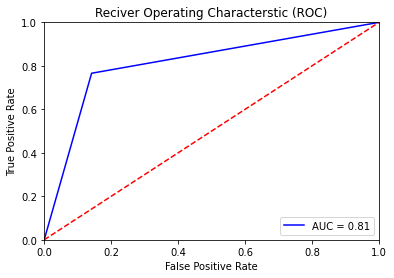

In [238]:
plt.title('Reciver Operating Characterstic (ROC)')
plt.plot(fpr5,tpr5,'b',label='AUC = %0.2f' %roc_auc5)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [239]:
#Interpretation: 
#The red dotted line represents the ROC curve of a purely random classifier; 
#a good classifier stays as far away from that line as possible (toward the top-left corner).

#From the above plot, we can see that our classifier (RandomForestClassifier) is away from the red dotted line; 
#with the AUC score 0.81.

In [240]:
#To check if the model is overfitted or not

In [241]:
gb_preds_train=GradientBoosting.predict(x_train)

In [242]:
print(classification_report(gb_preds_train,y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       292
           1       1.00      1.00      1.00       298

    accuracy                           1.00       590
   macro avg       1.00      1.00      1.00       590
weighted avg       1.00      1.00      1.00       590



In [243]:
confusion_matrix(gb_preds_train,y_train)

array([[292,   0],
       [  0, 298]], dtype=int64)

In [244]:
accuracy_score(gb_preds_train,y_train)*100

100.0

In [245]:
#Model is overfiting on train accuracy

In [246]:
#Tune the Hyperparameters using GridSearchCV (GradientBoostingClassifier)

In [261]:
tuning_parameters_5={'n_estimators':[140,150,160],
                    'max_depth':range(1,20)}

In [262]:
gboost_model1 = GradientBoostingClassifier()
gboost_grid=GridSearchCV(estimator=gboost_model1,param_grid=tuning_parameters_5,cv=3,scoring='accuracy')
gboost_grid.fit(x_train,y_train)
print('Best parameters for GradientBoostingClassifier: ', gboost_grid.best_params_ , '\n')

Best parameters for GradientBoostingClassifier:  {'max_depth': 3, 'n_estimators': 140} 



In [281]:
gboost_model2 = GradientBoostingClassifier(max_depth=3,n_estimators=140)
GradientBoosting2=gboost_model2.fit(x_train, y_train)

In [282]:
gb_preds2=GradientBoosting2.predict(x_test)

In [283]:
print(classification_report(gb_preds2,y_test))

              precision    recall  f1-score   support

           0       0.71      0.88      0.79       104
           1       0.90      0.75      0.82       150

    accuracy                           0.80       254
   macro avg       0.81      0.82      0.80       254
weighted avg       0.82      0.80      0.80       254



In [284]:
confusion_matrix(gb_preds2,y_test)

array([[ 92,  12],
       [ 38, 112]], dtype=int64)

In [285]:
accuracy_score(gb_preds2,y_test)*100

80.31496062992126

In [286]:
#checking if the overfitting has reduced

In [287]:
gb_preds2_train=GradientBoosting2.predict(x_train)

In [288]:
print(classification_report(gb_preds2_train,y_train))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       269
           1       0.97      0.90      0.94       321

    accuracy                           0.93       590
   macro avg       0.93      0.94      0.93       590
weighted avg       0.94      0.93      0.93       590



In [289]:
confusion_matrix(gb_preds2_train,y_train)

array([[261,   8],
       [ 31, 290]], dtype=int64)

In [290]:
accuracy_score(gb_preds2_train,y_train)*100

93.38983050847457

In [291]:
#Even after GridSearch The Overfitting problem is present

In [292]:
#6.Stack Generalization

In [293]:
#Build the stacking classifier using the Random forest, KNN and Naive bayes as base learners 
#(consider the hyperparameters tuned using GridSearchCV in the previous sessions).

In [295]:
from sklearn.ensemble import StackingClassifier
# consider the various algorithms as base learners
base_learners = [('AdaBoost_model', AdaBoostClassifier(n_estimators = 40, random_state = 10)),
                 ('RandomForest_model', RandomForestClassifier(n_estimators=10,criterion='entropy',max_depth=5,max_features='sqrt',
                           max_leaf_nodes=5,min_samples_leaf=5,min_samples_split=2)),
                 ('GradientBoosting_model', GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 10))]

# initialize stacking classifier 
# pass the base learners to the parameter, 'estimators'
# pass the Naive Bayes model as the 'final_estimator'/ meta model
stack_model = StackingClassifier(estimators = base_learners, final_estimator = GradientBoostingClassifier())

# fit the model on train dataset
StackingClass=stack_model.fit(x_train, y_train)

In [296]:
Sc_preds= StackingClass.predict(x_test)

In [297]:
print(classification_report(Sc_preds, y_test))

              precision    recall  f1-score   support

           0       0.72      0.83      0.77       112
           1       0.85      0.74      0.79       142

    accuracy                           0.78       254
   macro avg       0.78      0.78      0.78       254
weighted avg       0.79      0.78      0.78       254



In [298]:
confusion_matrix(Sc_preds, y_test)

array([[ 93,  19],
       [ 37, 105]], dtype=int64)

In [299]:
accuracy_score(Sc_preds, y_test)*100

77.95275590551181

In [ ]:
#------------------------------------END---------------------------------------------------------------------#